#### 본 매뉴얼에서는 상태공간모형(State-space model) 중 동태적공통요인모형의 추정에 대해 다룬다.
- 작성자: 고려대학교 경제학과 강규호 교수, 디지털신기술팀 이창훈 과장

<h4 style="text-align: center; font-size: 30px;">동태적 공통인자모형 (Dynamic Common Factor Model)</h4>

$\ \  \  \  \  $ \* $Y_t = (y_{1t},y_{2t},..,y_{Nt})$는 시점 $t$의 안정 시계열 벡터

$\ \  \  \  \  $ \* $G_t=$ Global 공통인자 (예: 글로벌 요인)

$\ \  \  \  \  $ \* $R_t=$ Regional 공통인자 (예: 선진국 요인)

$\ \  \  \  \  $ \* $L_t=$ Local 공통인자 (예: 선진국 중 소규모 개방경제 요인)

$\ \  \  \  \  $ \* $E_t = (e_{1t},e_{2t},..,e_{Nt}) = $ 변수 고유(variable-specific) 인자 (예: 한국 고유 요인) 


1. 측정식

$\ \  \  \  \  $ \*  각 변수는 $G_t$와 $e_{it}$에 의해서 영향을 받음

$$y_{it} = G_t \times \beta_{it} + e_it $$



$\ \  \  \  \  $ \*  $Y_t$ 중 일부는 $R_t$의 영향을 받음

$$y_{it} = G_t \times \beta_{it} + R_t \times \gamma_{it} + e_it $$


$\ \  \  \  \  $ \* $R_t$의 영향을 받는 변수 중 일부는 추가로 $L_t$의 영향을 받음 

$$y_{it} = G_t \times \beta_{it} + R_t \times \gamma_{it} + L_t \times \lambda_{it} + e_it $$

 
2. 전환식

$\ \  \  \  \  $ \* $G_t$, $R_t$, $L_t$, $E_t$는 상호독립이고 모두 안정적인 AR(1) 또는 AR(0) 과정을 따름

$\ \  \  \  \  $ \* 모든 오차항은 정규분포를 가정


3. 고려할 수 있는 모형의 종류는 세 가지입니다.

$\ \  \  \  \  $ (1) 글로벌 요인만 있는 경우

$\ \  \  \  \  $ (2) 글로벌과 Regional 요인이 있는 경우

$\ \  \  \  \  $ (3) 글로벌, Regional, Local 요인이 있는 경우

<단계 1> 분석에 필요한 기본 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd

<단계 2> `bok_da` 라이브러리 호출

In [2]:
import bok_da as bd

<단계 3> 데이터를 불러오기
- 지역별 주택가격지수 상승률(전년동월대비, %)
- 서울, 경기, 인천, 부산, 대구, 광주, 울산
- Pandas와 DataFrame에 익숙하지 않은 사용자는 아래 데이터불러오기 코드를 한줄씩 서로 다른 셀에 실행하고 결과를 보는 것을 추천한다. 참고로 원천기관에서 raw 데이터를 불러오고 전처리하는 과정이 복잡해 보일 수 있지만, 한번 해두면 크게 코드를 수정할 필요없이 새로운 데이터에 대해서도 분석 가능한 형태로 전처리 할 수 있기 때문에 장기적으로 효율적인 방법이다.

In [3]:
# 자료 불러오기
df = pd.read_excel('../data/Data_BayesEcon.xlsx', sheet_name = 'HP_Data') # 엑셀파일의 데이터 불러오기
df = df.set_index('통계표') # 통계표 이름의 열을 인덱스(데이터프레임 행의 정보)로 지정
df.columns = df.loc['계정항목'] # df의 index중 계정항목(서울, 경기, 인천, 부산, 대구, 광주, 울산)을 columns(열 정보)로 지정
df.columns.name = None # 열 이름 제거
df.index.name = None # 행 이름 제거
df = df.loc['2004/11':,:] # 2004년 11월부터 자료 사용
df.index = pd.to_datetime(df.index) + pd.offsets.MonthEnd(0) # df의 index를 날짜인덱스(DatetimeIndex)로 지정
df = df.astype(float) # df 각 원소 값을 float으로 변환
df
# Data는 T by N 행렬입니다. T = 표본 기간의 크기, N = 변수의 수
# 데이터: 지역별 전년동기대비 집값 상승률(월별, %, 출처:ECOS)
# 서울,경기,인천,부산,대구,광주,울산 (총 7개 변수)
# 순서대로 변수0, 변수1, .., 변수6에 해당합니다.
# 이 예시에서 N = 7입니다.

,서울,경기,인천,부산,대구,광주,울산
2004-11-30,-2.2,-4.3,-5.0,-4.7,-3.1,1.0,1.2
2004-12-31,-1.8,-4.1,-4.9,-4.3,-2.1,1.8,2.0
2005-01-31,-2.0,-3.9,-4.7,-4.0,-1.2,2.3,2.7
2005-02-28,-1.8,-3.4,-4.9,-3.8,-1.2,2.6,2.5
2005-03-31,-1.8,-3.2,-4.4,-4.0,-1.1,2.9,2.5
...,...,...,...,...,...,...,...
2023-07-31,-7.4,-12.3,-11.9,-10.5,-12.6,-8.4,-10.2
2023-08-31,-6.9,-11.6,-11.1,-10.3,-11.8,-8.3,-9.7
2023-09-30,-6.1,-10.5,-10.2,-9.9,-11.1,-7.9,-9.0
2023-10-31,-5.2,-9.2,-8.9,-9.2,-10.0,-7.2,-8.0


<단계 4> Regional 요인과 Local 요인의 영향을 받는 변수 인덱스를 정의한다. 수도권 요인(regional common effect)은 `rce`로 지정하고, 수도권 요인에서 특정 변수를 제외한 로컬 요인(local common effect)은 `lce`로 정의한다. 만약 만약 regional common effect를 가정하지 않는다면 rce = [ ] 로 설정한다. rce가 empty면, lce도 자동으로 empty로 설정된다. lce는 반드시 rce의 부분집합이어야 한며, lce를 가정하지 않는다면 lce=[ ]로 설정한다.

In [4]:
# 수도권 요인(Regional common effect)
rce = ['서울', '경기', '인천']

# 수도권 요인의 영향을 받는 변수 중 경기와 인천은 서울을 제외한 수도권 요인의 영향(Local common effect)을 받는다고 가정 
lce = ['경기', '인천'] # 서울 제외 수도권 요인

<단계 5> 요인 과정의 시차를 선택한다. `lag`이 2 이상인 경우 파라미터 수가 너무 많아 MLE로 추정이 용이하지 않으므로 0또는 1로 설정하는 것을 추천한다. `lag`은 공통요인과 변수 고유요인에 모두 동일하게 적용된다.

In [5]:
lag = 1 # 각 인자의 AR 시차

<단계 6> 마지막으로 아래 코드를 실행하시면 추정결과가 도출됩니다. 추정이 완료될 때가지 조금만 기다려주세요.
N이 크고 P=1이면 추정시간이 길어집니다.

<단계 6> `bok` 라이브러리-시계열분석 패키지(`ts`)-상태공간모형 서브패키지(`ssm`)에서 동태적요인모형 추정을 위한 `dfm` 함수를 불러온다. 사용하는 변수의 수가 클수록 추정시간이 길어진다.

In [6]:
from bok_da.ts.ssm import dfm

In [7]:
Y = df.copy()
res = dfm(Y, lag=lag, regional_countries=rce, local_countries=lce, verbose=False)

10/10 cycle finished


dfm 함수의 결과 인스턴스 res는 다음의 결과를 포함한다.

In [8]:
res.get_description()

,설명
global_factor,"공통요인(global factor) 추정치, T by 1"
regional_factor,"지역요인(regional factor) 추정치, T by 1"
local_factor,"로컬요인(local factor) 추정치, T by 1"
individual_factors,"변수고유요인, T by N"
table_var_decomp,분산분해 결과
table_common_ar,공통요인의 AR 계수 추정치와 표준오차. 만약 P = 0이면 Table_Common...
table_common_var,공통요인 충격의 분산 추정치와 표준오차
table_idio_ar,"변수고유요인의 AR 계수 추정치와 표준오차, N by 2. 만약 P = 0이면 Ta..."
table_idio_var,"변수고유요인 충격의 분산 추정치와 표준오차, N by 2"
table_global_factorloading,"공통요인 계수, N by 2"


In [9]:
res.table_var_decomp # 분산분해 결과

,공통요인(global factor),지역요인(regional factor),로컬요인(local factor),변수고유요인(individual factors)
서울,89.0,2.6,0.0,8.4
경기,90.1,1.6,4.9,3.4
인천,63.2,0.9,0.9,35.0
부산,17.2,0.0,0.0,82.8
대구,17.8,0.0,0.0,82.2
광주,19.3,0.0,0.0,80.7
울산,46.4,0.0,0.0,53.6


In [10]:
res.table_common_ar # 공통요인의 AR 계수 추정치와 표준오차

,추정치,표준편차
공통요인(global factor),0.950000,0.010
지역요인(regional factor),0.823696,0.035
로컬요인(local factor),0.931167,0.011


In [11]:
res.table_common_var # 공통요인 충격의 분산 추정치와 표준오차

,추정치,표준편차
공통요인(global factor),0.820,0.102
지역요인(regional factor),0.079,0.021
로컬요인(local factor),0.134,0.024


In [12]:
res.table_idio_ar # 고유 요인의 AR 계수 추정치와 표준오차

,추정치,표준편차
서울,0.920002,0.008
경기,0.613837,0.096
인천,0.904895,0.013
부산,0.944920,0.008
대구,0.936935,0.009
광주,0.927657,0.012
울산,0.931479,0.010


In [13]:
res.table_idio_var # 고유 요인 충격의 분산 추정치와 표준오차

,추정치,표준편차
서울,0.121,0.014
경기,0.435,0.088
인천,1.121,0.161
부산,0.717,0.092
대구,0.714,0.096
광주,0.652,0.088
울산,0.601,0.082


In [14]:
res.table_global_factorloading # 글로벌 요인 팩터로딩

,추정치,표준편차
서울,1.000,0.000
경기,1.481,0.054
인천,1.153,0.093
부산,0.406,0.070
대구,0.388,0.068
광주,0.365,0.064
울산,0.684,0.061


In [15]:
res.table_regional_factorloading # Regional 요인 팩터로딩

,추정치,표준편차
서울,1.000,0.000
경기,1.159,0.257
인천,0.792,0.325
부산,0.000,0.000
대구,0.000,0.000
광주,0.000,0.000
울산,0.000,0.000


In [16]:
res.table_local_factorloading # Local 요인 팩터로딩

,추정치,표준편차
서울,0.000,0.000
경기,1.000,0.000
인천,0.405,0.229
부산,0.000,0.000
대구,0.000,0.000
광주,0.000,0.000
울산,0.000,0.000


res의 `plot_dfm_factors` 메서드를 이용해서 추정된 요인의 그림을 그릴 수 있다. factor 인자를 이용해 그리고자 하는 요인을 지정할 수 있으며, `'global'`, `'regional'`, `'locl'`, `'individual'` 옵션을 제공한다. `figsize`는 그림의 크기, `legend`는 범례 표시 여부, `ncol`은 범례 열의 수를 결정한다.

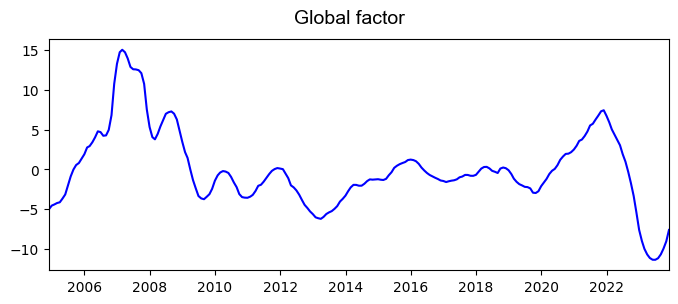

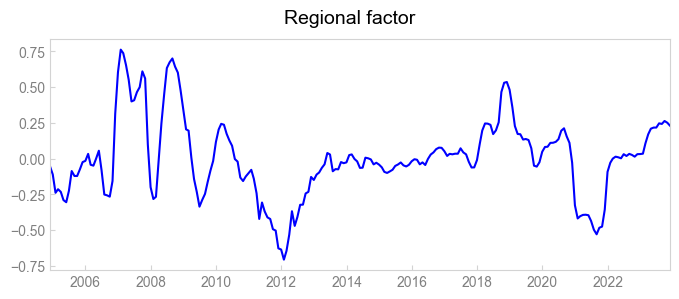

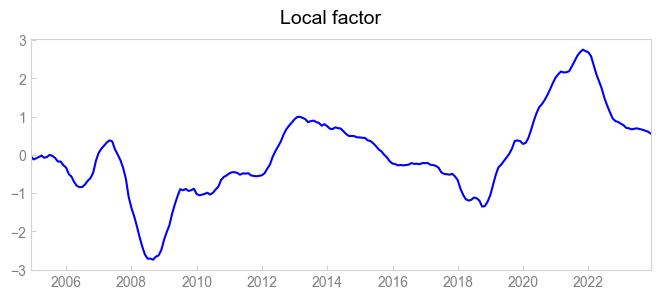

In [17]:
res.plot_dfm_factors(factor=['global', 'regional', 'local'], figsize=(8,3), legend=False, ncol=3)

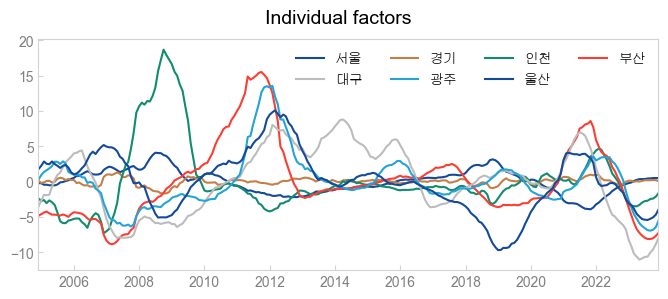

In [18]:
res.plot_dfm_factors(factor=['individual'], figsize=(8,3), ncol=4)

## DynamicFactorModel 클래스로 모형 설정하고, 추정하기

모형 클래스 불러오기
- `dfm` 함수를 불러오는 방법외에 `DynamicFactorModel` 클래스를 이용한 추정도 가능하다.

`ssm` 서브패키지에서 `DynamicFactorModel` 클래스를 `DFM`으로 불러온다.

In [22]:
from bok_da.ts.ssm import DynamicFactorModel as DFM

DFM을 이용해서 model 객체를 생성하고, model의 `fit` 메서드를 이용해서 추정한다.

In [23]:
Y = df.copy()
model = DFM(lag=lag, regional_countries=rce, local_countries=lce)
res = model.fit(Y, verbose=False)

10/10 cycle finished


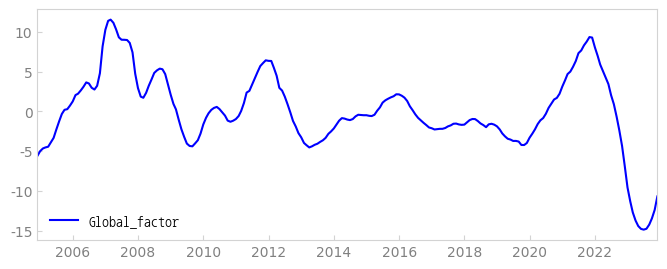

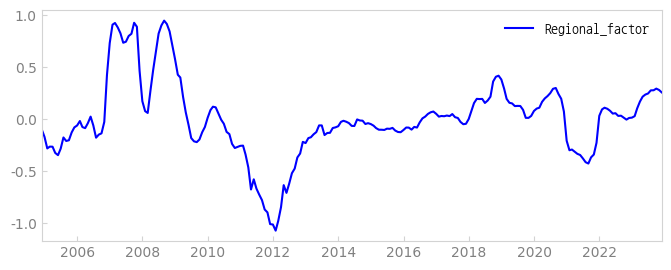

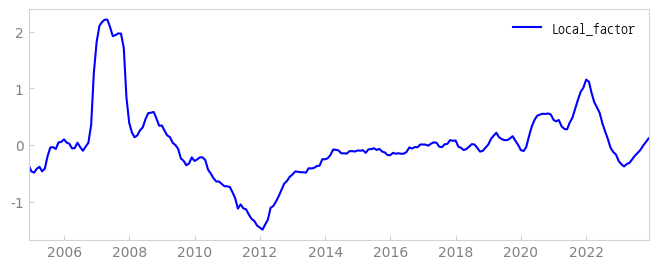

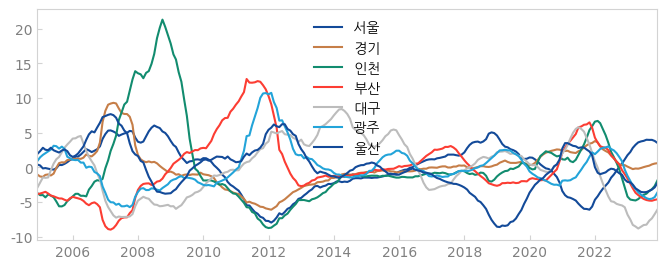

In [24]:
res.plot_dfm_factors(factor=['global', 'regional', 'local', 'individual'], figsize=(8, 3), legend=True, title=False)